# Tutorial de Big Data
## Bienvenidos a la clase 2

### Temario:

- Introducción a tweepy, textblob, nltk
- Ejercicio práctico: Analisis de sentimiento de tweets de Joe Biden pre y post elecciones
- Introducción a la Tarea 1 parte 2 

### Respuestas a las preguntas de los videos:

### Analisis de sentimiento de tweets de Joe Biden pre y post elecciones

In [19]:
#importamos los paquetes a utilizar
import os
import re
import string
from datetime import datetime 
import numpy as np

import pandas as pd
import tweepy
from textblob import TextBlob
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Crear con Sublime (u otro editor de texto) un archivo llamado `twitter_keys.txt` dentro de la carpeta `TP1` y guardar las 4 claves, una por línea, en el siguiente orden:
- API key
- API key secret
- Access token
- Access token secret

In [20]:
#Creamos variables que contienen nuestas claves de autenticación con la API
with open("twitter_keys.txt") as tw_k: 
    consumer_key = tw_k.readline().strip()
    consumer_secret = tw_k.readline().strip()
    access_key = tw_k.readline().strip()
    access_secret = tw_k.readline().strip()

In [21]:
#Le pasamos nuestras credenciales de twitter a tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [22]:
def get_all_tweets(screen_name, start_date):
    '''
    Esta funcion recibe el nombre de la persona de quien queremos extraer los 
    tweets y devuelve una lista con todos los tweets y sus datos. Es una función 
    compuesta por otras funciones ya incluidas en el pkg tweepy: api.user_timeline,
    status.created_at, status.id.
    Input: 
      screen_name (str): el nombre de la persona en twitter
      start_date(datetime): fecha desde la que se quieren los tweets
    Output:
      all_tweets (lista): lista con todos los tweets extraidos
    NOTA: .id y .created_at son atributos de los objetos status.
    '''
    # Solicitamos los 200 tweets mas recientes (200 es el maximo permitido en count)
    new_tweets = api.user_timeline(screen_name=screen_name, 
                                   tweet_mode="extended", count=200)
    # Creo una lista para almacenar TODOS los tweets y agrego los recién extraidos
    all_tweets = []
    all_tweets.extend(new_tweets)
    # guardo el id del ultimo tweet extraído 
    oldest = all_tweets[-1].id 
    
    # extraigo tweets de a 200 hasta que no haya más
    while len(new_tweets) > 0 and all_tweets[-1].created_at > start_date:
        # Solicito 200 tweets mas y los agrego a la lista de 'all_tweets'
        new_tweets = api.user_timeline(screen_name=screen_name, count=200,
                                       tweet_mode="extended", max_id=oldest-1)
        all_tweets.extend(new_tweets)
        # actualizo el id del ultimo tweet extraído
        oldest = all_tweets[-1].id 
        print("Hasta ahora se han extraido %s tweets" % len(all_tweets))

    return all_tweets


In [23]:
#Se analizará si hubo un cambio en los sentimientos predichos por los tweets 
#luego de la caída del gobierno afgano

date_before_event = datetime(2021, 7, 1, 0, 0, 0)
all_tweets_trump = get_all_tweets("DonaldJTrumpJr", date_before_event)


Hasta ahora se han extraido 400 tweets
Hasta ahora se han extraido 600 tweets
Hasta ahora se han extraido 800 tweets


In [24]:
#Veamos la lista con los primeros 5 tweets 
all_tweets_trump[:5]


[Status(_api=<tweepy.api.API object at 0x000001A64044F190>, _json={'created_at': 'Wed Aug 25 18:33:25 +0000 2021', 'id': 1430599207795179524, 'id_str': '1430599207795179524', 'full_text': 'Definitely the man in charge guys. https://t.co/NdmiZWls1u', 'truncated': False, 'display_text_range': [0, 34], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/NdmiZWls1u', 'expanded_url': 'https://twitter.com/w7voa/status/1430594780539539466', 'display_url': 'twitter.com/w7voa/status/1…', 'indices': [35, 58]}]}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 39344374, 'id_str': '39344374', 'name': 'Donald Trump Jr.', 'screen_name': 'DonaldJTrumpJr', 'location': '', 'description': 'EVP of Development & Acquisitions The @Trump Organi

In [25]:
def save_tweets_text(all_tweets, csv_file=None):
    '''
    Esta función guarda los tweets en un data frame y si se especifica un 
    archivo csv tambien se guardaran ahí. Elige solo algunos atributos de cada 
    status.
    Input:
        all_tweets (lista): lista con tweets y sus datos
        csv_file ('str'): nombre del archivo csv
    Output:
        df_all_tweets (df): tweets ordenados en una tabla con datos seleccinados
    '''
    all_tweets_selection = []
    for tweet in all_tweets:
        one_tweet = [tweet.id_str, tweet.created_at, tweet.full_text, 
                     tweet.retweeted, tweet.favorite_count, 
                     tweet.in_reply_to_screen_name]
        all_tweets_selection.append(one_tweet)
    
    df_all_tweets = pd.DataFrame(all_tweets_selection)
    df_all_tweets.columns = ['id_str', 'created_at', 'text', 'retweeted',
                            'favorite_count', 'in_reply_to_screen_name']
    if csv_file:
        df_all_tweets.to_csv(csv_file, index=False, encoding="utf-8")

    return df_all_tweets

In [26]:
df_all_tweets = save_tweets_text(all_tweets_trump, "tweets.csv")
df_all_tweets

,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name
0,1430599207795179524,2021-08-25 18:33:25,Definitely the man in charge guys. https://t.c...,False,2536,None
1,1430592686885584900,2021-08-25 18:07:30,But I was told…. \n\nAlso who the hell takes a...,False,6595,None
2,1430589531741466626,2021-08-25 17:54:58,MEXICO has done more than Joe Biden to get Ame...,False,1894,None
3,1430579791091093516,2021-08-25 17:16:15,Biden is really taking his America Last polici...,False,3097,None
4,1430576325278982146,2021-08-25 17:02:29,Have the Taliban give Biden any more orders si...,False,16477,None
...,...,...,...,...,...,...
795,1406222843638079494,2021-06-19 12:10:26,RT @JohnLeFevre: I went to boarding school (ch...,False,0,None
796,1406204485882499075,2021-06-19 10:57:30,RT @DonaldJTrumpJr: Because real Scientists/Sc...,False,0,None
797,1406196762184982530,2021-06-19 10:26:48,RT @CaliforniaPanda: Asian hate rears it’s UGL...,False,0,None
798,1406195762804019201,2021-06-19 10:22:50,It doesn’t lack empathy or understanding he’s ...,False,7320,None


In [27]:
# Emoticons contentos
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Emoticons Tristes
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [28]:
#Emoji patterns
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # simbolos & pictogramas
                           u"\U0001F680-\U0001F6FF"  # transporte & simbolos mapas
                           u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


In [29]:
#mrhod clean_tweets()
def clean_tweets(tweet):
    '''
    Esta función limpia el texto del tweet. Elimina emoticones, palabras vacías,
    links, indicaciones de retweets, etc. Para dejar en el texto solo las
    palabras con mayor contenido.
    Input:
        tweet (str): Texto del tweet original
    Output:
        tweet (str): Texto del tweet limpiado
    '''
    #Elimino caracteres de re-tweets   
    tweet = re.sub(r'^RT .*:', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #Reemplazo caracteres non-ASCII con espacio
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #Saco los links
    tweet = re.sub(r'https.*', '', tweet)
    #Saco los emoji
    tweet = emoji_pattern.sub(r'', tweet)
    
    #Separo los tweets in tokens
    word_tokens = word_tokenize(tweet)
    #Obtengo set de palabras vacias para luego eliminarlas
    stop_words = set(stopwords.words('english'))
    
    #loop por las condiciones
    filtered_tweet = []
    for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons and \
           w not in string.punctuation:
            filtered_tweet.append(w)

    
    return ' '.join(filtered_tweet)

In [30]:
#Este es un tweet sucio:
df_all_tweets.iloc[3]['text']

'Biden is really taking his America Last policies to a whole new level! #AmericaLast\n\nOnly 5 Percent Of US Evacuees From Afghanistan Are Americans https://t.co/jxZgHRX6Oc'

In [31]:
#Este es un tweet limpio:
clean_tweets(df_all_tweets.iloc[3]['text'])

'Biden really taking America Last policies whole new level AmericaLast Only 5 Percent Of US Evacuees From Afghanistan Are Americans'

In [32]:
def filter_year_and_month(date, start_time, end_time):
    '''
    Recibe una fecha y devuelve True, si la fecha de la fila esta 
    dentro de los dias especificados como inicio y fin, caso 
    contrario False.
    '''
    dd = datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
    return dd > start_time and dd < end_time


In [33]:
def generate_sentiment(texto):
    '''
    Esta funcion limpia el texto y analiza el sentimiento.
    Input:
        texto (str): texto a limpiar y analizar
    Output:
         polarity (float): en el rango [-1.0, 1.0] 
         subjectivity (float): en el rango [0.0, 1.0] 
    '''
    # Limpiamos el texto del tweet
    filtered_tweet = clean_tweets(texto)
    # Calculamos el sentimiento con el metodo TextBlob
    blob = TextBlob(filtered_tweet)
    Sentiment = blob.sentiment

    polarity = Sentiment.polarity
    subjectivity = Sentiment.subjectivity            

    return polarity, subjectivity
    

In [34]:
def add_sentiment(df, start_time, end_time):
    '''
    Esta funcion filtra los tweets entre las fechas de inicio y fin
    indicadas y agrega dos columnas, una de polarity y otra de subjectivity.
    Input:
        df (dataframe): tabla con los tweets en una columa llamada text
        start_time (datetime): fecha del tweet más antiguo a conservar
        end_time (datetime): fecha del tweet más reciente a conservar
    Output:
        df (dataframe): df actualizado con el filtro y nuevas columnas
    '''
    df = df[df.apply(lambda row: filter_year_and_month(row['created_at'], 
                                                start_time, end_time), axis=1)]

    df[["polarity", "subjectivity"]] = pd.DataFrame(df.apply(lambda row: \
                                            generate_sentiment(row['text']), \
                                            axis=1).tolist(), index=df.index)
    
    return df

In [35]:
start_time = datetime.strptime("2021-7-1", '%Y-%m-%d')
end_time = datetime.strptime("2021-8-23", '%Y-%m-%d')

In [36]:
tweets_sentimiento = add_sentiment(df_all_tweets, start_time, end_time)
tweets_sentimiento

C:\Users\Abi\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id_str,created_at,text,retweeted,favorite_count,in_reply_to_screen_name,polarity,subjectivity
48,1429502852632915971,2021-08-22 17:56:53,RT @RyanZinke: This Afghan child is more loyal...,False,0,None,0.000000,0.000000
49,1429460548769435660,2021-08-22 15:08:47,Maybe this is why we need some people in gover...,False,7760,None,0.125000,0.241667
50,1429459952809222146,2021-08-22 15:06:25,RT @SeanParnellUSA: Right off the top of my he...,False,0,None,0.000000,0.000000
51,1429455765568372739,2021-08-22 14:49:47,It seems The White House is providing inaccura...,False,14616,None,0.037500,0.154167
52,1429431083385360385,2021-08-22 13:11:42,RT @johncardillo: Ike went from Col to Gen of ...,False,0,None,0.100000,0.400000
...,...,...,...,...,...,...,...,...
715,1410733724346425345,2021-07-01 22:55:04,The Witch Hunt continues folks. I’m beginning ...,False,7441,None,0.034091,0.313636
716,1410714320959332353,2021-07-01 21:37:58,RT @MZHemingway: The politicized attacks on Tr...,False,0,None,0.233333,0.333333
717,1410621692997685251,2021-07-01 15:29:54,Understandable. https://t.co/ujAe14fpWf,False,19691,None,0.000000,0.000000
718,1410620392734134272,2021-07-01 15:24:44,Amazing to watch this nonsense in real time ht...,False,8357,None,0.400000,0.600000


## Trabajo Practico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el codigo sea facíl de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Lunes 23/8 a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 1 deben estar dentro de esa carpeta.
- Tambíen deben completar el link de su repositorio -para que pueda ser clonado y corregido- en la siguiente google sheet: https://docs.google.com/spreadsheets/d/1qaXCveEw3MjEwXQsu2zpqUz34BiaCMR0WapcsQ7jGs0/edit?usp=sharing
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No completen la google sheet hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, yo no corregiré sus tareas hasta no ver el link en la google sheet.
    - No hagan nuevos <i>push</i> despues de habér entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Introducción:

Para la realización del TP1 (parte dos) decidimos analizar los tweets de la cuenta de Donald Trump Jr. (@DonaldJTrumpJr) desde el 11 de junio de 2021 hasta 23 de agosto de 2021. 



#### Ejercicio 1: 
Impriman algunos de los tweets más negativos (filtrando por la columna de `polarity`) y su fecha

In [37]:
#extraemos las 10 observaciones que tienen el menor valor de polarity y creamos un nuevo data
# frame para este conjunto de variables. A este data frame lo llamamos "mas_negativos"

mas_negativos = tweets_sentimiento.nsmallest(10, 'polarity')

type(mas_negativos) # verificamos que sea un data frame

# ahora nos quedamos solo con las columnas correspondientes al texto de los tweets (columna 2) y 
# al valor de polarity (columna 6):

mas_negativos.iloc[:,[2,6]] # accedemos a un grupo de columnas por su posición en números enteros.



,text,polarity
361,These people are insane!!! https://t.co/u2Z0zB...,-1.00
577,Radical Democrats are trying to end the filibu...,-1.00
587,RT @bennyjohnson: David Chipman is an insane r...,-1.00
54,RT @mchooyah: Hey everyone: watch as these pol...,-0.80
582,It’s almost like the leftists pushing this CRT...,-0.80
649,RT @charliespiering: Exclusive: Cynthia Lummis...,-0.75
145,My thoughts on Joe Biden’s disastrous handling...,-0.70
207,From someone who knows a lot about the region ...,-0.70
645,RT @MZHemingway: People who call the few-hour ...,-0.70
243,RT @ggreenwald: Let me just provide one shocki...,-0.65


#### Ejercicio 2: 
Impriman algunos de los tweets más positivos (filtrando por la columna de `polarity`) y su fecha

In [38]:
#extraemos las 10 observaciones que tienen el mayor valor de polarity y creamos un nuevo data
# frame para este conjunto de variables. A este data frame lo llamamos "mas_positivos"

mas_positivos = tweets_sentimiento.nlargest(10, 'polarity')

type(mas_positivos) # verificamos que sea un data frame

# ahora nos quedamos solo con las columnas correspondientes al texto de los tweets (columna 2) y 
# al valor de polarity (columna 6):

mas_positivos.iloc[:,[2,6]] # accedemos a un grupo de columnas por su posición en números enteros.



,text,polarity
327,RT @SenJohnBarrasso: David Chipman is an anti-...,1.00
688,Guys were asking all those in attendance at to...,0.85
112,"Had a great day with @Kyleforgeard, @mchooyah,...",0.80
161,RT @MZHemingway: This is a great speech about ...,0.80
652,RT @DonaldJTrumpJr: .@DonaldJTrumpJr on Biden'...,0.80
670,HAPPY BIRTHDAY AMERICA 🇺🇸 🇺🇸🇺🇸#IndependenceDay...,0.80
672,LOL https://t.co/g3Xzqa0Jy7,0.80
446,"RT @DonaldJTrumpJr: LOL, hey ⁦@ABC⁩ even I’d t...",0.75
331,Good thing none of that happens in America... ...,0.70
683,@BrendaFurqueron Good call.,0.70


#### Ejercicio 3: 
Agreguenle al df llamado `tweets_sentimiento` una nueva columna llamada `positivo` que tenga:
- 1 cuando el tweet tiene polarity > 0, 
- 0 cuando el tweet tiene polarity = 0, 
- -1 cuando el tweet tiene polarity < 0 

In [39]:
# creamos una lista de condiciones para la variable que representa la polaridad del sentimiento que luego nos 
# servirá para asignar los valores correspondientes al cumplimiento de cada condición
lista_condiciones = [ 
    (tweets_sentimiento['polarity']>0), # la primera condición es si la polaridad es mayor a cero
    (tweets_sentimiento['polarity']==0), # la segunda condición es si la polaridad es igual a cero
    (tweets_sentimiento['polarity']<0)] # la tercera condición es si la polaridad es menor a cero

# a continuación definimos una lista de valores
lista_valores = [1,0,-1] 

# ahora utilizaremos la función np.select. Ahora es cuando utilizamos la lista_condiciones y lista valores 
# para aplicar los valores correspondientes a aquellas variables que cumplan determinadas condiciones

tweets_sentimiento['positivo']=np.select(lista_condiciones, lista_valores, default="No especificado") # la nueva lista de valores 
# lo asignamos a una nueva fila de la matriz "tweets_sentimiento"


<ipython-input-39-ecedee8dc618>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento['positivo']=np.select(lista_condiciones, lista_valores, default="No especificado") # la nueva lista de valores


#### Ejercicio 4: 
Agrupen los tweets por día y promedien la polaridad. Luego hagan un gráfico con el sentimiento por día.

In [40]:
# Primero definimos una nueva variable con las fechas de los tweets. Solo consideramos el día, mes y año.  

tweets_sentimiento['Data'] = tweets_sentimiento['created_at'].dt.strftime('%Y-%m-%d') # utilizamos la función 
# dt.strftime para aplicar un formato temporal en años, meses y días, es decir, ahora no consideramos
# las horas ni minutos. 


<ipython-input-40-d1cc25d199e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_sentimiento['Data'] = tweets_sentimiento['created_at'].dt.strftime('%Y-%m-%d') # utilizamos la función


In [41]:
# A continuación calculamos el promedio de cada variable por día 

grouped_tweets_sentimiento = tweets_sentimiento.groupby("Data") # primero agrupamos las variables por día 


In [42]:

mean_tweets_sentimiento = grouped_tweets_sentimiento.mean() # calculamos el promedio de cada una de las variables en grouped_tweets_sentimiento

mean_tweets_sentimiento # de esta forma conseguimos el promedio por día de las variables retweeted, favorite_count, polarity y subjectivity



,retweeted,favorite_count,polarity,subjectivity
Data,,,,
2021-07-01,False,10324.400000,0.153485,0.269394
2021-07-02,False,4137.666667,0.088442,0.215360
2021-07-03,False,6382.625000,0.100417,0.436357
2021-07-04,False,6427.666667,0.184788,0.326940
2021-07-05,False,14054.000000,0.241667,0.442857
2021-07-06,False,4782.583333,0.054663,0.288968
2021-07-07,False,4113.222222,-0.028283,0.284016
2021-07-08,False,5000.600000,-0.002857,0.437143
2021-07-09,False,3101.625000,0.066994,0.201260


In [43]:
mean_tweets_sentimiento = mean_tweets_sentimiento.reset_index() # agregamos un índice a las observaciones por día
mean_tweets_sentimiento
# notemos que tenemos, en total, 46 observaciones diarias 

,Data,retweeted,favorite_count,polarity,subjectivity
0,2021-07-01,False,10324.400000,0.153485,0.269394
1,2021-07-02,False,4137.666667,0.088442,0.215360
2,2021-07-03,False,6382.625000,0.100417,0.436357
3,2021-07-04,False,6427.666667,0.184788,0.326940
4,2021-07-05,False,14054.000000,0.241667,0.442857
5,2021-07-06,False,4782.583333,0.054663,0.288968
6,2021-07-07,False,4113.222222,-0.028283,0.284016
7,2021-07-08,False,5000.600000,-0.002857,0.437143
8,2021-07-09,False,3101.625000,0.066994,0.201260
9,2021-07-10,False,2746.500000,0.060119,0.119286


In [44]:
# dado que al hacer el promedio la variable "positivo" esta dejó de tomar solo los valores 0,1 o -1 la volvemos a definir 
lista_condiciones = [
    (mean_tweets_sentimiento['polarity']>0),
    (mean_tweets_sentimiento['polarity']==0),
    (mean_tweets_sentimiento['polarity']<0)]

lista_valores = [1,0,-1]

mean_tweets_sentimiento['Positivo']=np.select(lista_condiciones, lista_valores, default="No especificado")

mean_tweets_sentimiento

,Data,retweeted,favorite_count,polarity,subjectivity,Positivo
0,2021-07-01,False,10324.400000,0.153485,0.269394,1
1,2021-07-02,False,4137.666667,0.088442,0.215360,1
2,2021-07-03,False,6382.625000,0.100417,0.436357,1
3,2021-07-04,False,6427.666667,0.184788,0.326940,1
4,2021-07-05,False,14054.000000,0.241667,0.442857,1
5,2021-07-06,False,4782.583333,0.054663,0.288968,1
6,2021-07-07,False,4113.222222,-0.028283,0.284016,-1
7,2021-07-08,False,5000.600000,-0.002857,0.437143,-1
8,2021-07-09,False,3101.625000,0.066994,0.201260,1
9,2021-07-10,False,2746.500000,0.060119,0.119286,1


In [45]:
# A continuación realizamos un gráfico de la variable polarity por día 

import matplotlib.pyplot as mplt # Esta función es utilizada para mostrar los gráficos

import seaborn as sbn
sbn.set(rc={'figure.figsize':(10, 5)}) # utilizaremos seaborn para el estilo de los graficos

In [46]:
# importamos los paquetes necesarios para realizar los gráficos 
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

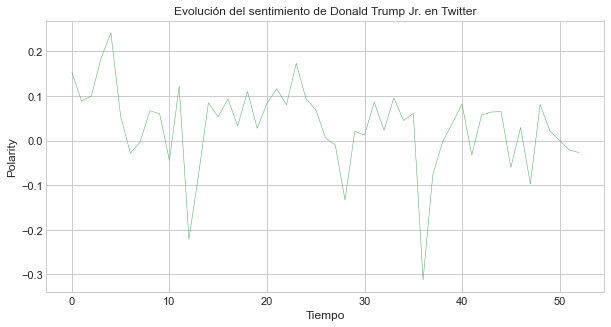

<Figure size 720x360 with 0 Axes>

In [48]:

with plt.style.context('seaborn-whitegrid'): # elegimos el tema del gráfico
    mean_tweets_sentimiento['polarity'].plot(linewidth=0.5, color='C2') # elegimos el color de la variable sentimiendo 
    # de Donald Trump Jr. y el grosor de la línea. 
    plt.xlabel('Tiempo')
    # Definimos el título del eje y
    plt.ylabel('Polarity')
  
    # Definimos el título del gráfico
    plt.title('Evolución del sentimiento de Donald Trump Jr. en Twitter')

  
# aplicamos la función show() para observar el gráfico terminado 
plt.show()


plt.savefig('graficoprueba.eps', format='eps')

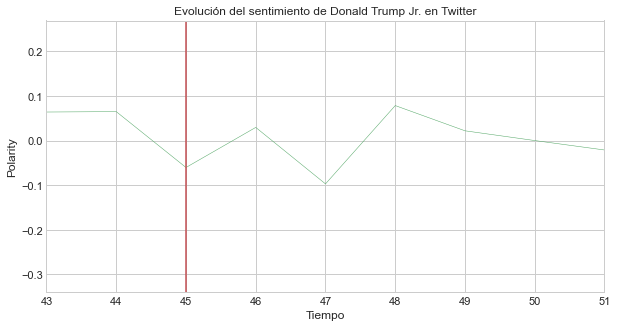

In [32]:
# nos interesa ver si hubo algún cambio en el sentimiento de Donald Trump Jr. cuando tomaron el poder los 
# talibanes en Afganistan (15 de agosto de 2021, correspondiente a la observación número 45). 
with plt.style.context('seaborn-whitegrid'): # elegimos el tema del gráfico
    mean_tweets_sentimiento['polarity'].plot(linewidth=0.5, color='C2') # elegimos el color de la variable sentimiendo 
    # de Donald Trump Jr. y el grosor de la línea. 
    plt.xlabel('Tiempo')
    # Definimos el título del eje y
    plt.ylabel('Polarity')
  
    # Definimos el título del gráfico
    plt.title('Evolución del sentimiento de Donald Trump Jr. en Twitter')

    # en este caso graficamos el sentimiento entre el 15 de agosto de 2021 y el 23 de agosto de 2021. 
    plt.xlim(43,51)
  
    plt.axvline(x=45, color='r', linestyle='-') # graficamos un línea en el eje x correspondiente al día en el que los 
    # talibanes tomaron el poder en Kabul 
# aplicamos la función show() para observar el gráfico terminado 
plt.show()

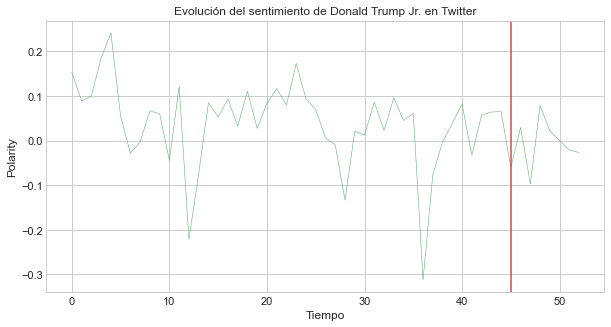

In [33]:
# replicamos el gráfico anterior solo que con todas las observaciones disponibles 
with plt.style.context('seaborn-whitegrid'): # elegimos el tema del gráfico
    mean_tweets_sentimiento['polarity'].plot(linewidth=0.5, color='C2') # elegimos el color de la variable sentimiendo 
    # de Donald Trump Jr. y el grosor de la línea. 
    plt.xlabel('Tiempo')
    # Definimos el título del eje y
    plt.ylabel('Polarity')
  
    # Definimos el título del gráfico
    plt.title('Evolución del sentimiento de Donald Trump Jr. en Twitter')

    plt.axvline(x=45, color='r', linestyle='-') # graficamos un línea en el eje x correspondiente al día en el que los 
    # talibanes tomaron el poder en Kabul 
# aplicamos la función show() para observar el gráfico terminado 
plt.show()


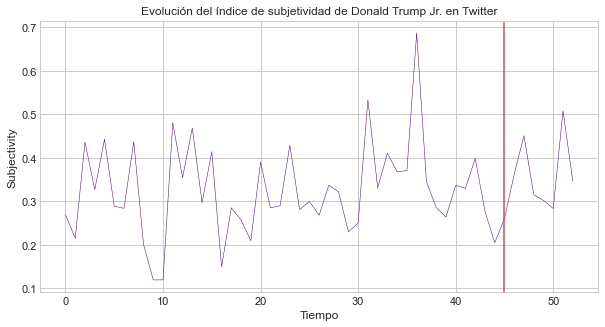

In [34]:
# Realizamos el mismo gráfico para el índice de subjetividad 

with plt.style.context('seaborn-whitegrid'): # elegimos el tema del gráfico
    mean_tweets_sentimiento['subjectivity'].plot(linewidth=0.5, color='indigo') # elegimos el color de la variable sentimiendo 
    # de Donald Trump Jr. y el grosor de la línea. 
    plt.xlabel('Tiempo')
    # Definimos el título del eje y
    plt.ylabel('Subjectivity')
  
    # Definimos el título del gráfico
    plt.title('Evolución del índice de subjetividad de Donald Trump Jr. en Twitter')

 
    plt.axvline(x=45, color='r', linestyle='-') # graficamos un línea en el eje x correspondiente al día en el que los 
    # talibanes tomaron el poder en Kabul 
# aplicamos la función show() para observar el gráfico terminado 
plt.show()

In [ ]:
with plt.style.context('seaborn-whitegrid'): # definimos el tema del grafico
    fig, eje = mplt.subplots()
    eje.plot(mean_tweets_sentimiento['subjectivity'], color ='C2', linewidth=1, label='Subjectivity') # ejes del grafico
    eje.plot(mean_tweets_sentimiento['polarity'], color='indigo', linewidth=1, # ejes del grafico
    label='Polarity')
    eje.legend()
    eje.set_xlabel('Tiempo') 
    eje.set_ylabel('Valor del índice')
    
    eje.set_title('Evolución del sentimiento positivo y subjetividad de Donald Trump Jr. en Twitter',fontsize=11)

#### Repaso del análisis de sentimiento: 
Por último, los invito a que exploren el análisis de sentimiento de forma teórica y práctica:
- Revisen la documentación de `TextBlob` y del método `sentiment` https://textblob.readthedocs.io/en/dev/ 
- Prueben en la practica el resultado que arroja para determinadas frases (les dejo unos ejemplos, pero pueden probar los que quieran)


In [38]:
# Consideramos interesante analizar el sentimiento que expresan dos diarios en EEUU al comunicar sobre
# una noticia similar. En particular elegimos analizar las noticias referidas a la toma del poder de los 
# talibanes en Afganistán que comunicaron los diarios Wall Street Journal y USA Today. Es importante recarlcar
# que se suele identificar al primero de estos diarios como un diario de "derecha" y al segundo como uno 
# de "centro-izquierda". 

# A continuación se encuentran los links a las noticias que analizaremos: 

# - Wall Street Journal: https://www.wsj.com/articles/the-taliban-are-here-the-final-days-before-kabuls-collapse-11629505499
# - USA Today: https://www.usatoday.com/story/news/2021/08/15/afghanistan-taliban-fighters-enter-kabul/8141644002/


In [39]:
# Antes de aplicar el sentiment analysis al cuerpo de las noticias consideramos interesante aplicarlo a los títulos de cada una:

# Título de la noticia del diario Wall Street Journal 

WSJ_titulo = TextBlob('‘The Taliban Are Here’: The Final Days Before Kabul’s Collapse')
WSJ_titulo.sentiment
# En este caso, polarity arroja un valor de 0 y subjectivity arroja un valor de 1. Lo cual nos indica
# un valor medio de positividad y un valor alto de subjetividad. 

Sentiment(polarity=0.0, subjectivity=1.0)

In [40]:
# Título de la noticia del diario USA Today

USA_titulo = TextBlob('After two decades and billions spent, Afghan government collapses as Taliban takes Kabul')
USA_titulo.sentiment

# En este caso, polarity arroja un valor de -0.1 y subjectivity un valor de 0.1. Esto nos indica 
# un valor negativo de positividad (mayor negatividad) y un valor medio de subjetividad. Al compararlo con la noticia 
# anterior podemos decir que, el titulo de la noticia del diario USA Today tiene un menor grado de positividad y subjetividad 
# que el título del Wall Street Journal. 

Sentiment(polarity=-0.1, subjectivity=0.1)

In [41]:
# A continuación aplicaremos el sentiment analysis sobre 20 palabras extraidas aleatoriamente de los primeros 3 párrafos de cada noticia:

import random
# abrimos el archivo en modo lectura
with open("USA.txt", "r") as file:
    allText = file.read()
    words = list(map(str, allText.split()))
  
    # imprimimos 20 palabras aleatorias
    usa_random=random.choices(words,k=20)
    print(usa_random)
# repetimos el procedimiento para WSJ

with open("WSJ.txt", "r") as file:
    allText = file.read()
    words = list(map(str, allText.split()))
  
    # imprimimos 20 palabras aleatorias
    wsj_random=random.choices(words,k=20)
    print(wsj_random)


['panic', 'Ghani', 'Kabul', 'Embassy.', 'reshape', 'after', 'In', 'from', 'a', 'of', 'to', 'the', 'fighters', 'stunning', 'sweep', 'near', 'the', 'soon', 'U.S.', 'which']
['The', 'of', 'States,', 'emerald-green', 'was', 'book,', 'former', 'in', 'a', 'a', 'Afghan', 'turned', 'he', 'Afghan', 'of', 'The', 'troops', 'day', 'the', 'followed,']


In [42]:
# aplicamos el sentiment analysis a los grupos de palabras extraidos aleatoriamente 
suma1=[] # definimos una lista para llenar en el loop
# WSJ
for i in range(0,20,1):
    diario=TextBlob(wsj_random[i]) # aplicamos el sentiment analysis a cada una de las palabras (iteramos sobre las palabras)
    suma1.append(diario.sentiment[1]) # nos quedamos solo con el valor correspondiente a polarity
print(suma1)

# calculamos el promedio del valor del sentimiento 

promedio_sentimiento_wsj=sum(suma1)/20

print(promedio_sentimiento_wsj)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [43]:
# aplicamos el sentiment analysis a los grupos de palabras extraidas aleatoriamente 
suma1=[]
# USA 
for i in range(0,20,1):
    diario=TextBlob(usa_random[i]) # aplicamos el sentiment analysis a cada una de las palabras (iteramos sobre las palabras)
    suma1.append(diario.sentiment[1]) # nos quedamos solo con el valor correspondiente a polarity
print(suma1)

# calculamos el promedio del valor del sentimiento 

promedio_sentimiento_usa=sum(suma1)/20

print(promedio_sentimiento_usa)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0]
0.06999999999999999


In [44]:
# Ahora bien, también probaremos aplicarle el sentiment analysis a los textos completos

# WSJ

wsj_texto_completo=TextBlob("Afghan President Ashraf Ghani, a former World Bank technocrat and author of the book Fixing Failed States, gathered officials on Saturday, Aug. 7, for a conference on improving relations between the attorney general’s office and local officials. He spent much of the rest of the day on the emerald-green lawn of the presidential palace, reading a book, according to a palace official. By then, the Afghan state was collapsing. The number of local districts under Kabul is control was diminishing almost by the hour. Kunduz, the biggest city in the northeast, fell the following night. Within 24 hours, other provincial capitals followed, many without a fight. Taliban fighters seized bases full of U.S.-supplied arms and turned them on a demoralized Afghan army unable to resupply troops with weapons, food or water. President Biden was at his home in Wilmington, Del., where he played a round of golf at the Fieldstone Golf Club and then held a virtual meeting with Team USA to congratulate them on their performance at the Tokyo Olympics. The White House said he was briefed on Afghanistan in between.")

print(wsj_texto_completo.sentiment)

# USA

usa_texto_completo=TextBlob("In a swift and stunning rout, Taliban fighters seized control of Afghanistan is capital Sunday, completing their sweep of the besieged nation as the Afghan government collapsed after two decades of U.S. efforts to reshape the region as part of its war on terror. Embattled President Ashraf Ghani fled the country as the Taliban entered the capital city of Kabul, and American troops scrambled to evacuate thousands of U.S. diplomats and Afghans from the U.S. Embassy.The Taliban, which had been on the outskirts of Kabul for hours, announced soon after it would move farther into a city gripped by panic throughout the day as helicopters raced overhead to evacuate personnel from the U.S. Embassy. Smoke rose near the compound as staff destroyed important documents. Several other Western missions prepared to pull their people out.")

print(usa_texto_completo.sentiment)


Sentiment(polarity=-0.02321428571428571, subjectivity=0.2517857142857143)
Sentiment(polarity=0.184375, subjectivity=0.465625)
